In [19]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import community
import random
import yaml

In [20]:
'''
Create the graph to use
'''

n, tau1, tau2, mu = 500, 3, 1.5, 0.3
av, mx, mn = 30, 80, 60
G = nx.generators.community.LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=av, max_degree=mx, min_community=mn)

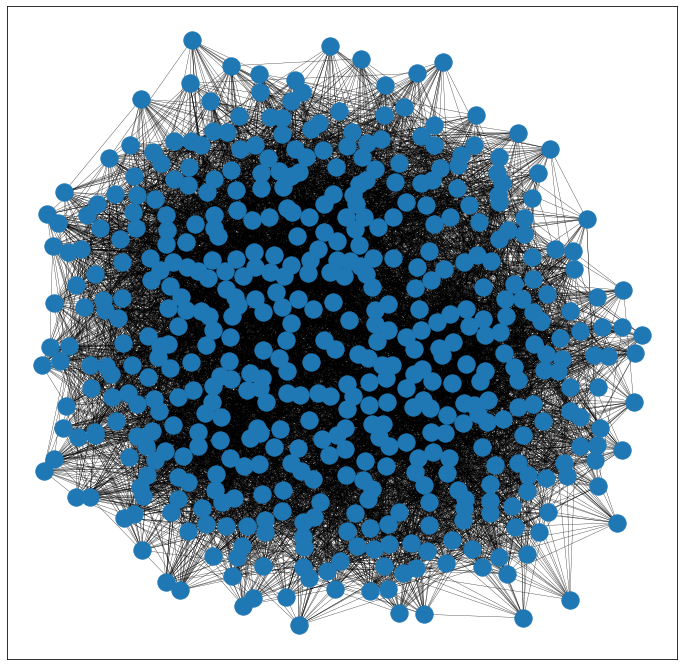

In [21]:
'''
Visualize the graph
'''

pos = nx.spring_layout(G, k=0.5)
plt.figure(1, figsize=(12,12))
nx.draw_networkx(G, with_labels=False, pos=pos, width=0.3)

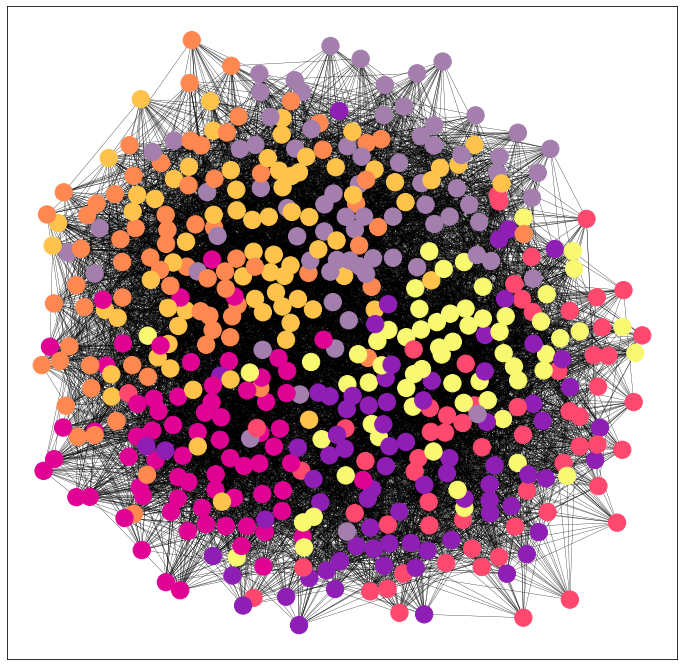

In [22]:
'''
Visualize the "ground truth" communities
'''

communities = []
ground_truth_communities = []
for node in G.nodes:
    if G.nodes[node]['community'] not in communities:
        communities.append(G.nodes[node]['community'])
    ground_truth = communities.index(G.nodes[node]['community'])
    G.nodes[node]['community'] = ground_truth
    ground_truth_communities.append(ground_truth)
scheme = ['#8F1FB4', '#E00393', '#FF486E', '#FF8851', '#FFC34C', '#F9F871', '#A47FAE', '#FFE8FF', 
          '#5EBAB1', '#0093EE', '#C1FCF5']
cols = [scheme[G.nodes[i]['community']] for i in range(len(G.nodes))]
plt.figure(2, figsize=(12,12))
nx.draw_networkx(G, with_labels=False, pos=pos, node_color=cols, width=0.3)

In [23]:
'''
Create a copy of the graph on which to run the Louvain algorithm. We remove the current communities.
'''

G_no_communities = G.copy()

In [24]:
for node in G_no_communities.nodes:
    del G_no_communities.nodes[node]['community']

In [25]:
'''
Run the Louvain algorithm 1000 times. Each time a random seed is generated.
'''

partition_check = np.zeros((500, 1000))
for i in range(1000):
    seeed = random.randint(1, 1000000000)
    partition = community.best_partition(G_no_communities, random_state=seeed)
    for j in range(500):
        partition_check[j, i] = partition[j]

In [34]:
'''
Determine which nodes have been categorised differently during different runs of the Louvain algorithm
'''

changing_nodes = []
for node in range(500):
    if len(set(partition_check[node, :])) > 1:
        changing_nodes.append(node)

In [35]:
'''
The identities of the nodes which have flipped.
'''

changing_nodes

[1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 37,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 75,
 77,
 78,
 81,
 82,
 83,
 84,
 85,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 105,
 106,
 107,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 128,
 129,
 130,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 141,
 142,
 144,
 145,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 158,
 159,
 160,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 179,
 180,
 181,
 182,
 183,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 197,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 211,
 212,
 2

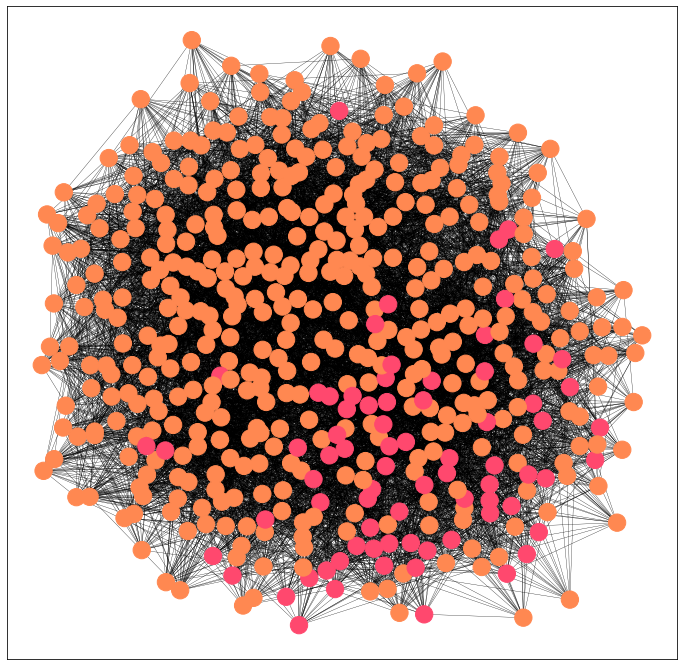

In [29]:
'''
Visualize which of the nodes are flipping. These are shown in orange, and the stable nodes in pink.
'''

cols = [scheme[2] for i in range(len(G.nodes))]
for node in changing_nodes.keys():
    cols[node] = scheme[3]
plt.figure(2, figsize=(12,12))
nx.draw_networkx(G, with_labels=False, pos=pos, node_color=cols, width=0.3)

In [38]:
'''
Obtain the distinct partitions and determine how frequently they each appear.
'''

distinct_partitions, part_count = np.unique(partition_check, axis=1, return_counts=True)

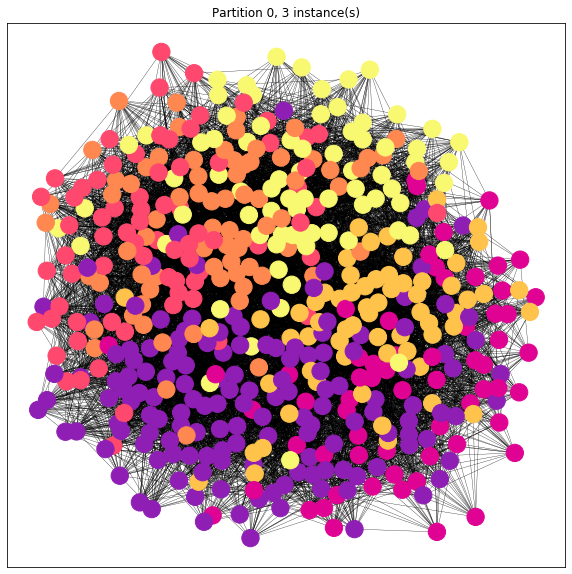

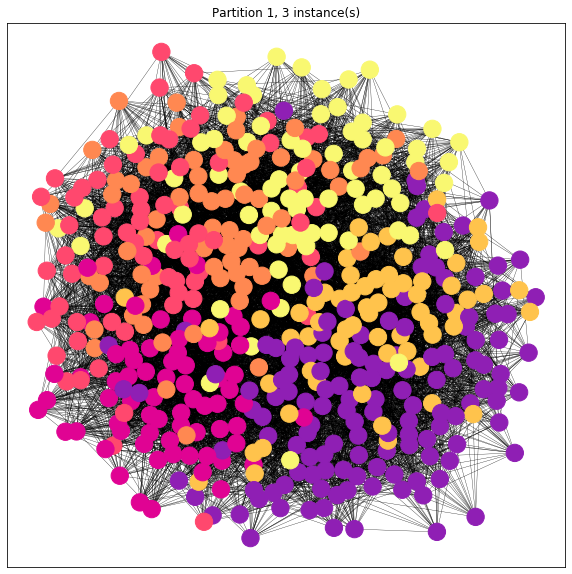

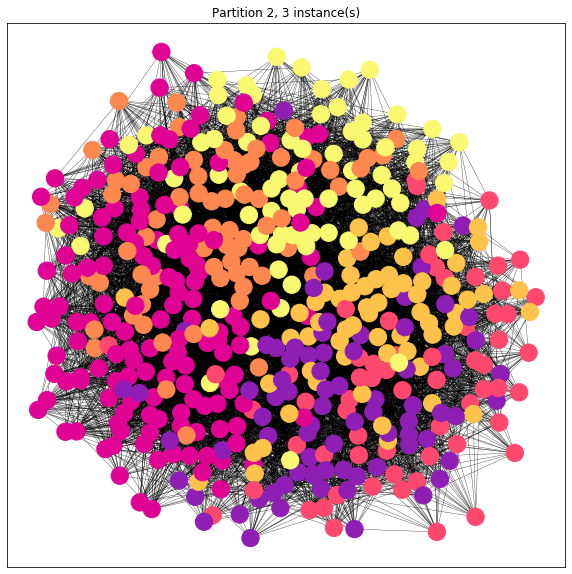

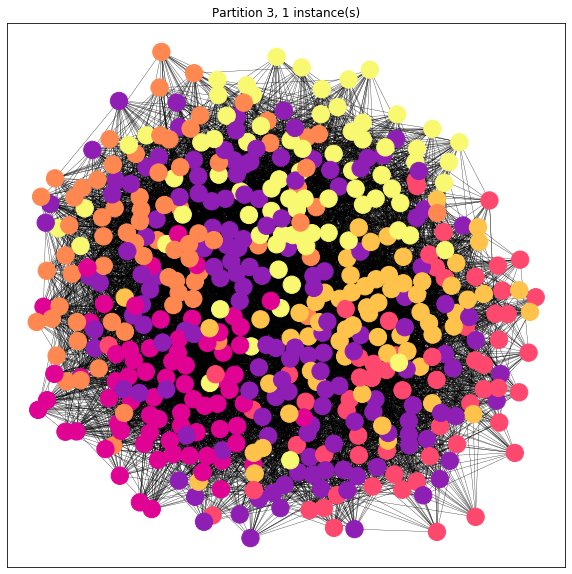

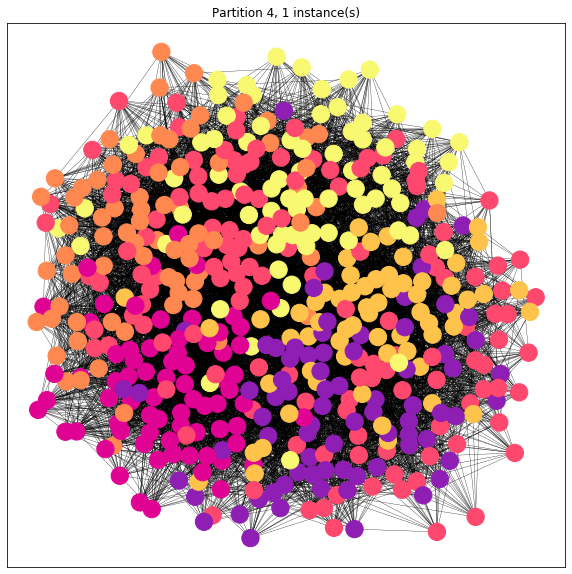

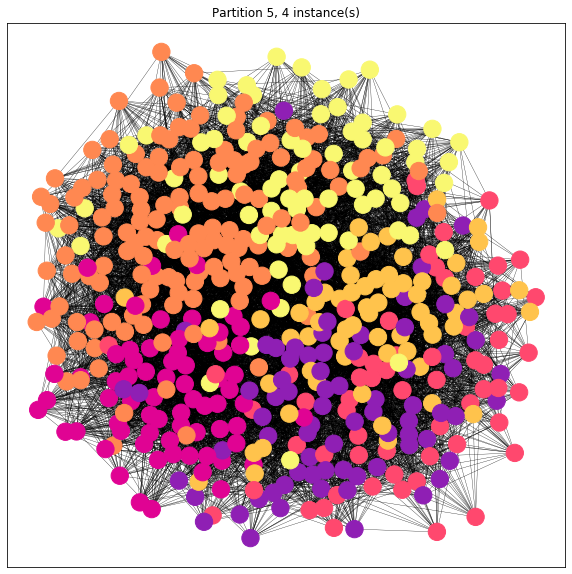

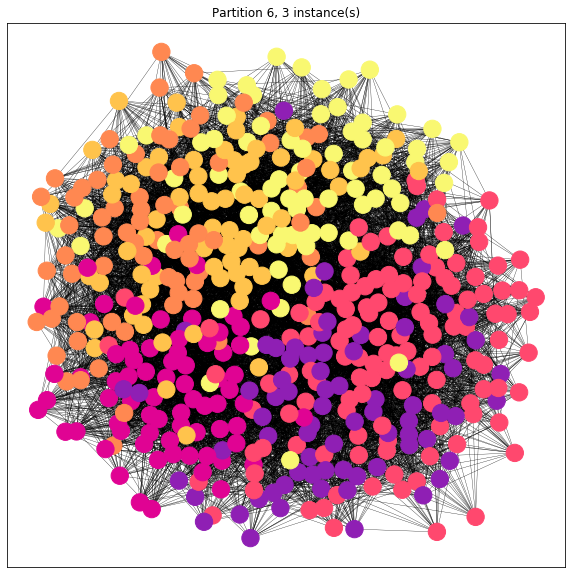

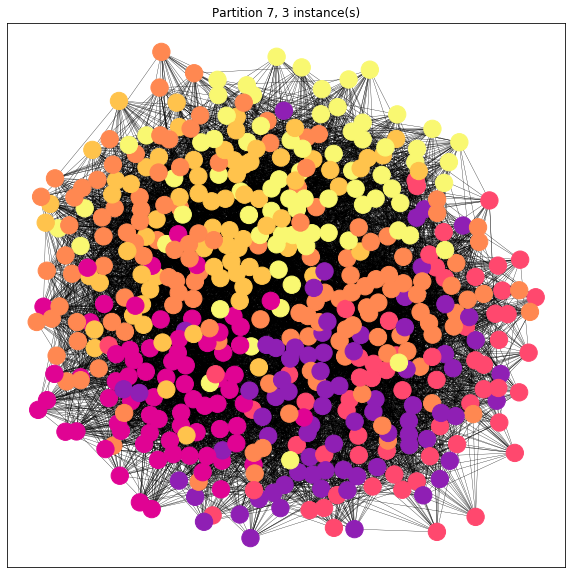

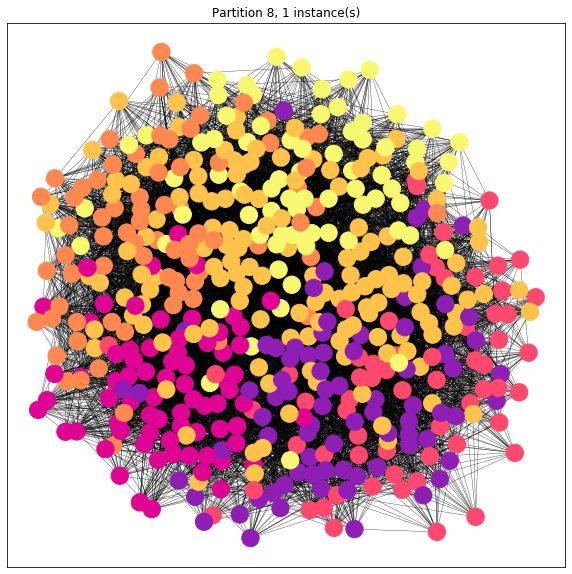

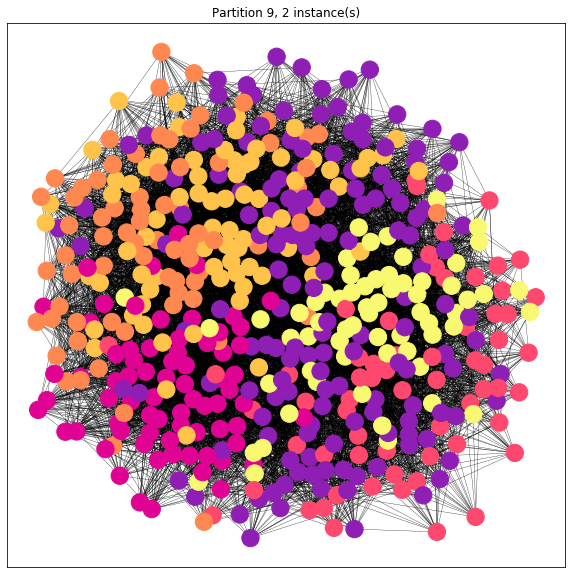

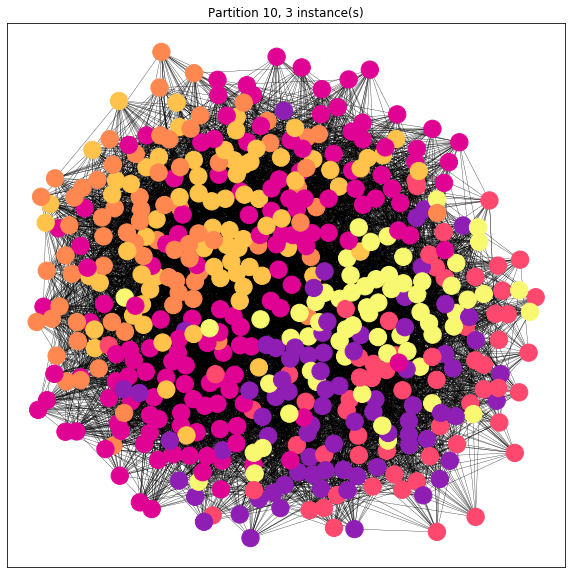

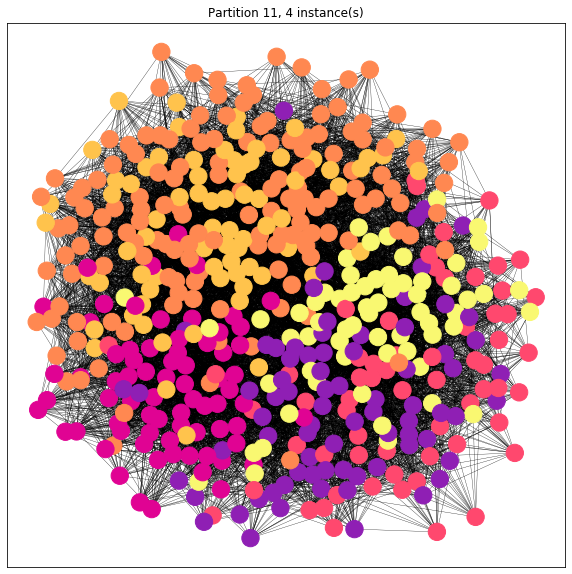

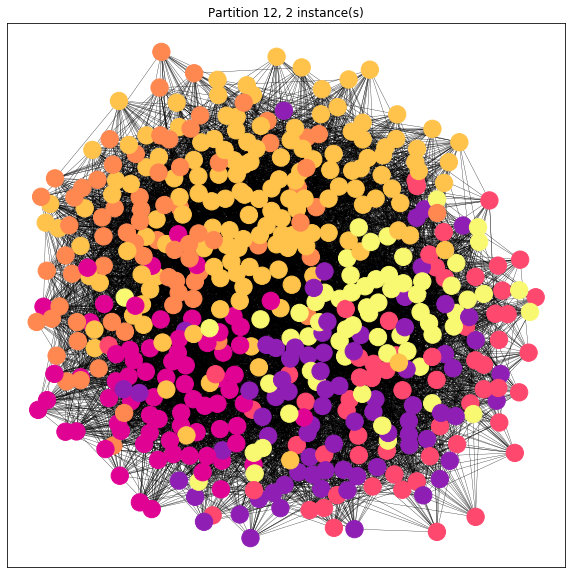

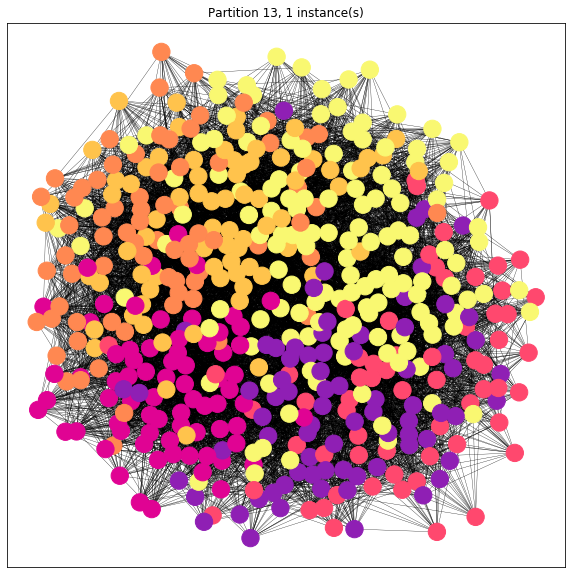

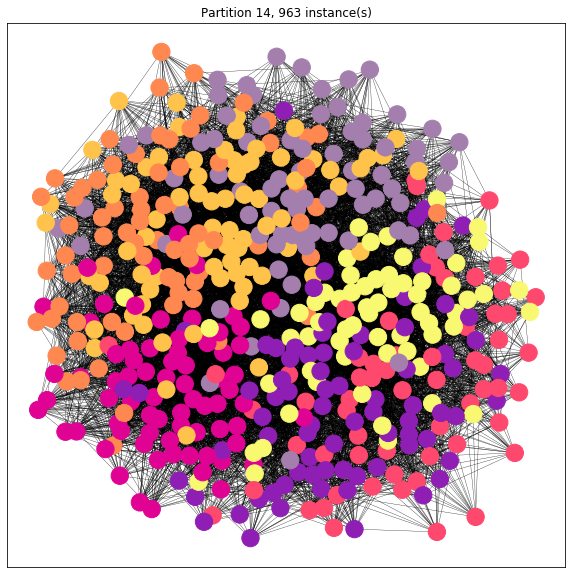

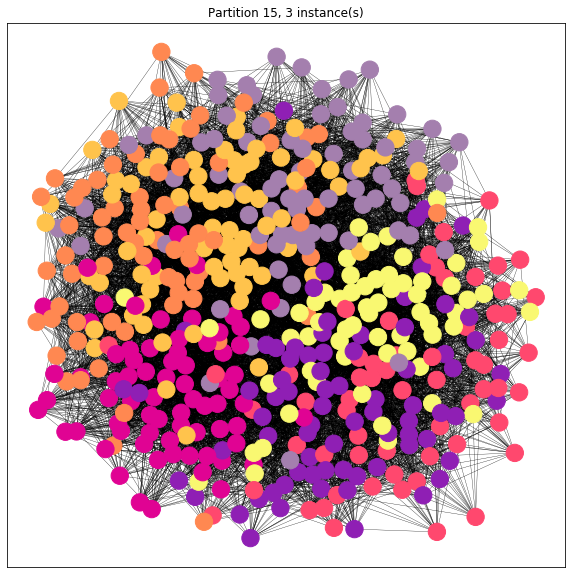

In [43]:
'''
Visualize the distinct partitions found by the Louvain algorithm.
'''

scheme = ['#8F1FB4', '#E00393', '#FF486E', '#FF8851', '#FFC34C', '#F9F871', '#A47FAE', '#FFE8FF', 
          '#5EBAB1', '#0093EE', '#C1FCF5']

for i in range(len(part_count)):
    fig = plt.figure(figsize=(10,10))
    for node in G.nodes:
        G.nodes[node]['community'] = int(distinct_partitions[node,i])
    cols = [scheme[G.nodes[i]['community']] for i in range(len(G.nodes))]
    nx.draw_networkx(G, with_labels=False, pos=pos, node_color=cols, width=0.3)
    plt.title('Partition {0}, {1} instance(s)'.format(i, part_count[i]), fontdict={'fontsize':12})
    fig.show()